# Quantum Random Number Generation

## Using Perceval Library

[Perceval Docs](https://perceval.quandela.net/docs/)

Installation:

In [ ]:
%%capture
!pip install perceval-quandela tqdm

## Boson Sampling

[Perceval Docs](https://perceval.quandela.net/docs/notebooks/Boson%20Sampling.html)

### Importing necessary methods

In [1]:
from IPython import display
from collections import Counter
from tabulate import tabulate
from tqdm.auto import tqdm
import gzip
import pickle
import time

import sympy as sp
import random

import perceval as pcvl
import perceval.lib.symb as symb

#### Defining a function to measure performance

In [22]:
import itertools

def qrng(bits,modes ,input_mode,backend='CliffordClifford2017'):
    m = modes      #number of modes
    
    Unitary = pcvl.Matrix.random_unitary(m) #creates a random unitary of dimension m
    
    Sampling_Backend = pcvl.BackendFactory().get_backend(backend)
    
    # Photon modes:
    if input_mode == 1:
        # 1: |1,1,...,1,0,...,0>
        baseState = f'|1{ (m//2 - 1) * ",1"}{ (m//2) * ",0"}>'
    elif input_mode == 2:
        # 2: |15,0,...,0>
        baseState = f'|{ (m * 1) }{ (m-1) * ",0"}>'       # Too Many Zeros
    elif input_mode == 3:
        # 3: |2,2,...2,1,...,1,0,...,0>
        baseState = f'|3{ (m//4 - 1) * ",3"}{ (m//4) * ",2"}{ (m//4) * ",1"}{ (m//4) * ",0"}>'
    elif input_mode == 4:
        # 4: |2,2,...,2,0,...,0>
        baseState = f'|2{ (m // 2 - 1) * ",2" }{ (m // 2) * ",0"}>'
    elif input_mode == 5:
        # 5: |1,1,...,1>
        baseState = f'|1{ (m - 1) * ",1" }>'

    s1, s2 = [], []
    processedBits = 0
    while (processedBits <= bits):
        sample = Sampling_Backend(Unitary).sample(pcvl.BasicState(baseState))
        s1.append(sample[0])
        s2.append(sample[1])
        processedBits += 1

    s1_normalized = [ 1 if i > 0 else 0 for i in s1[:bits]]
    s2_normalized = [ 1 if i > 0 else 0 for i in s2[:bits]]
    
    result = []
    
    for index in range(len(s1_normalized)):
        if s1_normalized[index] > s2_normalized[index]:
            result.append(0)
        elif s2_normalized[index] > s1_normalized[index]:
            result.append(1)

    return result

Entropy:  0.6881
Average value:  0.45
Valid output length:  100


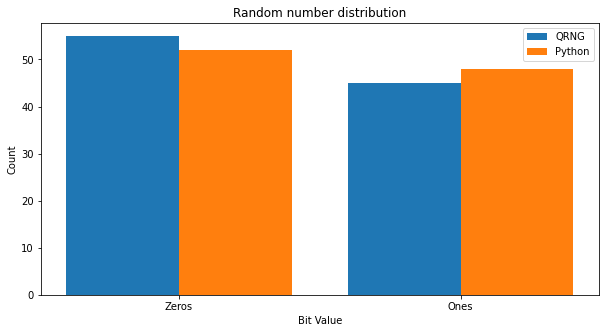

CPU times: user 203 ms, sys: 63.8 ms, total: 267 ms
Wall time: 111 ms


In [34]:
result = qrng(1000,modes=2,input_mode=1)
# result = qrng(1000,modes=2,input_mode=2)
# result = qrng(1000,modes=4,input_mode=3)
# result = qrng(100,modes=2,input_mode=4)
evaluate(result)